In [1]:
import json, os
import pandas as pd

with open('compressionMetrics.json', 'r') as f:
    data = f.readline()

compressData = json.loads(data)    
compressData = json.loads(compressData)

In [11]:
cmDF = pd.json_normalize(compressData)
cmDF.dropna(subset=['frames'],inplace=True)
#https://mode.com/example-gallery/python_histogram/

# cmDF['compressionRatio']=cmDF.compressedFileSize/cmDF.origFileSize*100
# cmDF['mbytesPerSec'] = cmDF.origFileSize/cmDF.executionTime/1000000   ### This is 1,000,000 Bytes per second
cmDF

,frames,filename,fileSize,recType,sixeX,sixeY,bitsPerSample,conversion_stats.filesize,conversion_stats.time,compressionArguments.compression,compressionArguments.cr,compressionArguments.tileSize,compressionArguments.quality,compressionArguments.level,compressionArguments.predictor,compressionArguments.psnr
0,3.0,WD-76845-096.ome.compression.jp2k.cr.10000.til...,1.323267e+06,recompressed,52470.0,52303.0,8.0,1.323202e+06,322.394870,jp2k,10000.0,1024.0,NaN,NaN,NaN,NaN
1,3.0,WD-76845-096.ome.compression.zstd.tile.512.tiff,6.287012e+09,recompressed,52470.0,52303.0,8.0,6.287012e+09,569.002231,zstd,NaN,512.0,NaN,NaN,NaN,NaN
2,40.0,WD-76845-097.ome.compression.lzw.tile.1024.tiff,6.765038e+10,recompressed,26139.0,27120.0,16.0,6.765038e+10,2913.726898,lzw,NaN,1024.0,NaN,NaN,NaN,NaN
4,3.0,WD-76845-096.ome.compression.jpeg.q.90.tile.51...,2.543388e+09,recompressed,52470.0,52303.0,8.0,2.543388e+09,132.281222,jpeg,NaN,512.0,90.0,NaN,NaN,NaN
5,40.0,WD-76845-097.ome.compression.lzw.tile.512.tiff,6.572409e+10,recompressed,26139.0,27120.0,16.0,6.572409e+10,2800.715020,lzw,NaN,512.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3.0,WD-76845-096.ome.compression.lzw.predictor.non...,7.722604e+09,recompressed,52470.0,52303.0,8.0,7.722604e+09,293.520137,lzw,NaN,1024.0,NaN,NaN,none,NaN
126,3.0,WD-76845-096.ome.compression.deflate.predictor...,6.184316e+09,recompressed,52470.0,52303.0,8.0,6.184316e+09,444.914502,deflate,NaN,NaN,NaN,NaN,horizontal,NaN
127,40.0,WD-76845-097.ome.compression.jpeg.tile.1024.tiff,2.883799e+09,recompressed,26139.0,27120.0,8.0,2.883799e+09,438.090347,jpeg,NaN,1024.0,NaN,NaN,NaN,NaN
128,40.0,WD-76845-097.ome.compression.none.tile.1024.tiff,8.002791e+10,recompressed,26139.0,27120.0,16.0,8.002791e+10,660.454299,none,NaN,1024.0,NaN,NaN,NaN,NaN


In [15]:
cmDF['uncompressedImageSize'] = cmDF['bitsPerSample'] / 8 * cmDF['sixeX'] * cmDF['sixeY'] * cmDF['frames']
ctime = 'conversion_stats.time'
ctype = 'compressionArguments.compression'


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f571815ba20>,
      dtype=object)

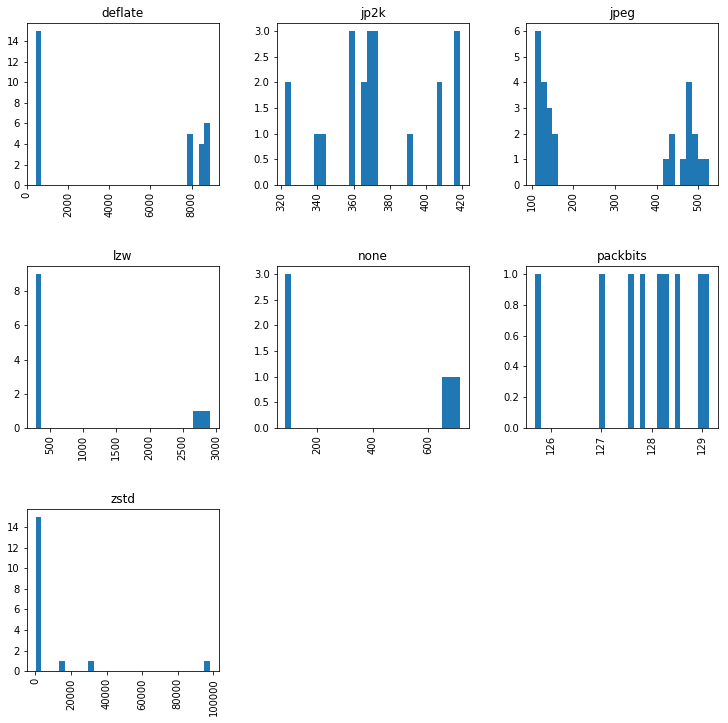

In [45]:
cmDF.hist(column=ct,bins=30,by=ctype,figsize=(12,12))
#cmDF['compressionArguments.compression'].hist(by=cmDF['conversion_stats.time'],bins=30)

In [49]:
cmDF.groupby(cmDF[ctype])[ctime].describe()

,count,mean,std,min,25%,50%,75%,max
compressionArguments.compression,,,,,,,,
deflate,30.0,4468.423453,4060.538566,443.639648,501.594689,4182.663025,8599.206594,8896.902789
jp2k,21.0,372.424889,28.938797,322.154958,358.170473,369.227291,391.907101,418.960683
jpeg,27.0,282.685686,176.416270,107.959393,132.113890,150.273651,476.962235,526.324692
lzw,12.0,950.739581,1116.314383,286.660937,338.584347,356.583034,942.398382,2913.726898
none,6.0,388.733951,325.895589,85.784148,92.986172,379.151111,677.036272,714.388154
packbits,9.0,127.903495,1.065144,125.682460,127.575458,128.129922,128.481544,129.147264
zstd,18.0,8396.482460,23725.504351,105.099592,435.287669,581.692825,717.299767,98220.064110


In [46]:
cmDF.groupby(cmDF.compressionMethod).compressionRatio.describe()

AttributeError: 'DataFrameGroupBy' object has no attribute 'compressionRatio'

In [2]:
cmDF.groupby(cmDF.compressionMethod).executionTime.describe()

NameError: name 'cmDF' is not defined

In [3]:
import plotly.express as px
df = cmDF
# Here we use a column with categorical data
fig = px.histogram(df, x="compressionRatio",color='compressionMethod',nbins=25,marginal="rug", # can be `box`, `violin`
                         hover_data=df.columns)
fig.show()

NameError: name 'cmDF' is not defined

In [ ]:
cmDF.compressionRatio.describe()

In [4]:
cmDF.executionTime

NameError: name 'cmDF' is not defined

In [5]:
import plotly.express as px
df = cmDF
# Here we use a column with categorical data
fig = px.histogram(df, x="executionTime",color='compressionMethod',nbins=25,marginal="rug", # can be `box`, `violin`
                         hover_data=df.columns)
fig.show()

NameError: name 'cmDF' is not defined

In [6]:
fig = px.histogram(df, x="mbytesPerSec",nbins=25,color='compressionMethod',opacity=0.8,marginal="rug", # can be `box`, `violin`
                         hover_data=df.columns)
fig.show()

NameError: name 'df' is not defined